# Train / Test

We'll start by creating some data set that we want to build a model for (in this case a polynomial regression):

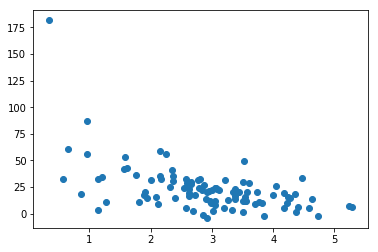

In [45]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds


scatter(pageSpeeds, purchaseAmount)

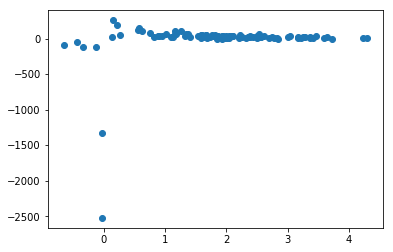

In [12]:
%matplotlib inline
import numpy as np
from pylab import *
np.random.seed(2)

pageSpeeds = np.random.normal(2.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100)/pageSpeeds

scatter(pageSpeeds, purchaseAmount)



Now we'll split the data in two - 80% of it will be used for "training" our model, and the other 20% for testing it. This way we can avoid overfitting.

In [46]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]


In [22]:
testSize = 90

In [23]:

trainX = pageSpeeds[:testSize]
testX = pageSpeeds[testSize:]

trainY = purchaseAmount[:testSize]
testY = purchaseAmount[testSize:]

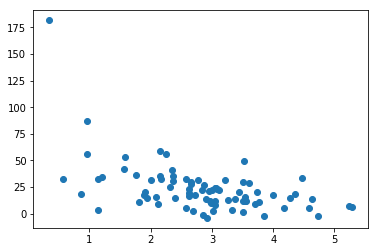

In [47]:
scatter(trainX, trainY)

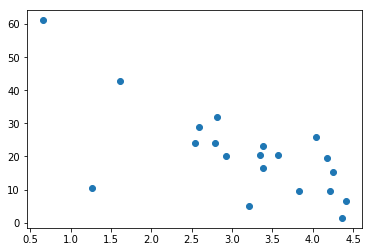

In [48]:
scatter(testX, testY)

Here's our training dataset:

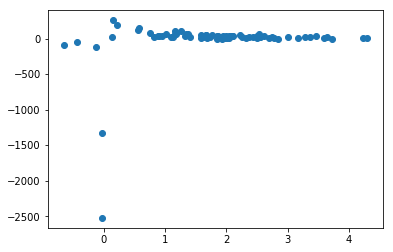

In [15]:
scatter(trainX, trainY)

And our test dataset:

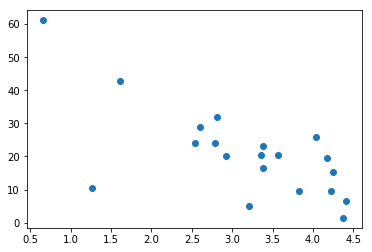

In [4]:
scatter(testX, testY)

Now we'll try to fit an 8th-degree polynomial to this data (which is almost certainly overfitting, given what we know about how it was generated!)

In [49]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 8))

In [51]:
x.shape

(80,)

In [30]:
x = np.array(trainX)
y = np.array(trainY)

p8 = np.poly1d(np.polyfit(x, y, 4))

Let's plot our polynomial against the training data:

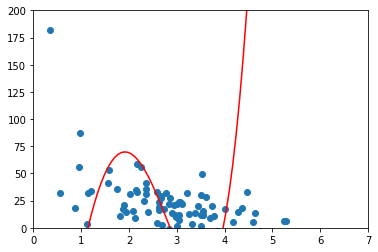

In [50]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p8(xp), c='r')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (100,) and (90,)

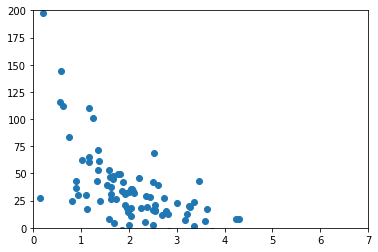

In [34]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()

axes.set_xlim([0, 7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(x), c='r')
plt.show()

And against our test data:

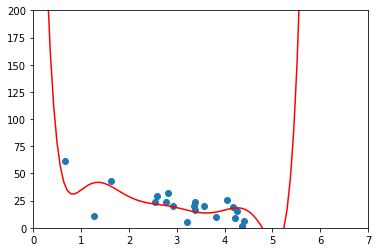

In [7]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

Doesn't look that bad when you just eyeball it, but the r-squared score on the test data is kind of horrible! This tells us that our model isn't all that great...

In [8]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))

print(r2)


0.30018168612


...even though it fits the training data better:

In [9]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print(r2)

0.642706951469


If you're working with a Pandas DataFrame (using tabular, labeled data,) scikit-learn has built-in train_test_split functions to make this easy to do.

Later we'll talk about even more robust forms of train/test, like K-fold cross-validation - where we try out multiple different splits of the data, to make sure we didn't just get lucky with where we split it.

## Activity

Try measuring the error on the test data using different degree polynomial fits. What degree works best?